# Phase 2 - Week 1 - Day 1 PM - Artificial Neural Network (ANN) - Multiclass Classification

> **NOTES**

> Before you run the notebook below, **it is recommended to run the program using the GPU** so that the training process doesn't take too long.
> If you use Google Colab, then you can set it by following the steps: `Runtime` >> `Change runtime type` >> `T4 GPU`.

# A. Multiclass Classification

## A.1 - Data Loading

To demonstrate building ANN model in Multiclass Classificaiton, we will tackle Fashion MNIST.

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

*Source : [url](https://github.com/zalandoresearch/fashion-mnist)*

<img src='https://www.researchgate.net/profile/Saeed-Reza-Kheradpisheh/publication/342801790/figure/fig2/AS:911232181735425@1594266090934/Sample-images-from-Fashion-MNIST-dataset.png'>

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
# Data Loading

## Download the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

# Data splitting
(X_train_val, y_train_val), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (51000, 28, 28)
Val Size   :  (9000, 28, 28)
Test Size  :  (10000, 28, 28)


In [3]:
# Define the Class Names

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# Function for Visualize A Group of Images

def plot_images(instances, n_data, images_per_row=10):
  n_rows = int(np.ceil(n_data/images_per_row))
  n_cols = images_per_row
  plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
  for row in range(n_rows):
      for col in range(n_cols):
          index = n_cols * row + col
          plt.subplot(n_rows, n_cols, index + 1)
          plt.imshow(instances[index], cmap='gray', interpolation='nearest')
          plt.axis('off')
          plt.title(class_names[y_train[index]], fontsize=12)
          if index == n_data-1:
            break
  plt.subplots_adjust(wspace=0.2, hspace=0.5)
  plt.show()

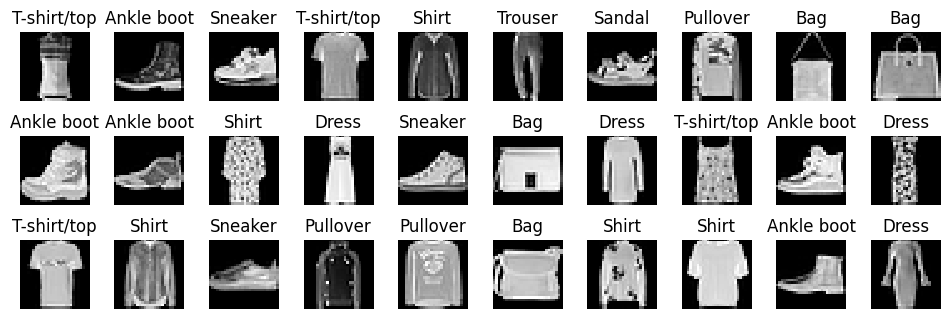

In [5]:
# Visualization of the First 30 Images

plot_images(X_train, 30, images_per_row=10)

## A.2 - Feature Engineering

In [6]:
# Feature Scaling

X_train = X_train / 255.
X_val = X_val / 255.
X_test = X_test / 255.

## A.3 - Sequential API

### A.3.1 - Model Definition

Notes of hyperparameter `loss` :
* Use `sparse_categorical_crossentropy` :
  + The target just a class index/number such as from `0` to `9` like in this case

* Use `categorical_crossentropy` :
  + The target is in form of one-hot vectors
  + To represent class `3` the target will be `[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]`

In [7]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Create Sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model_sequential_mnist = Sequential()
model_sequential_mnist.add(Flatten(input_shape=[28, 28]))
model_sequential_mnist.add(Dense(300, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_sequential_mnist.add(Dense(100, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_sequential_mnist.add(Dense(10, activation='softmax', kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))

# Compile
model_sequential_mnist.compile(loss='sparse_categorical_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])
model_sequential_mnist.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


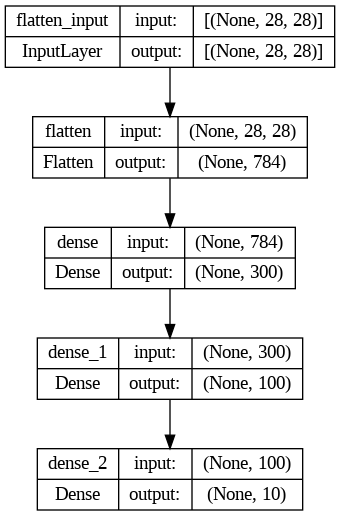

In [8]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential_mnist, show_shapes=True)

### A.3.2 - Model Training

In [9]:
# Train the Model

%%time
history_seq_mnist = model_sequential_mnist.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1594/1594 [==============================] - 14s 7ms/step - loss: 0.4848 - accuracy: 0.8255 - val_loss: 0.3743 - val_accuracy: 0.8666
Epoch 2/30
1594/1594 [==============================] - 8s 5ms/step - loss: 0.3624 - accuracy: 0.8664 - val_loss: 0.3377 - val_accuracy: 0.8754
Epoch 3/30
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3277 - accuracy: 0.8798 - val_loss: 0.3661 - val_accuracy: 0.8659
Epoch 4/30
1594/1594 [==============================] - 6s 4ms/step - loss: 0.3029 - accuracy: 0.8863 - val_loss: 0.3419 - val_accuracy: 0.8772
Epoch 5/30
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2850 - accuracy: 0.8942 - val_loss: 0.3639 - val_accuracy: 0.8654
Epoch 6/30
1594/1594 [==============================] - 6s 4ms/step - loss: 0.2708 - accuracy: 0.8986 - val_loss: 0.3254 - val_accuracy: 0.8850
Epoch 7/30
1594/1594 [==============================] - 6s 4ms/step - loss: 0.2583 - accuracy: 0.9033 - val_loss: 0.3556 - val_accuracy

### A.3.3 - Model Evaluation

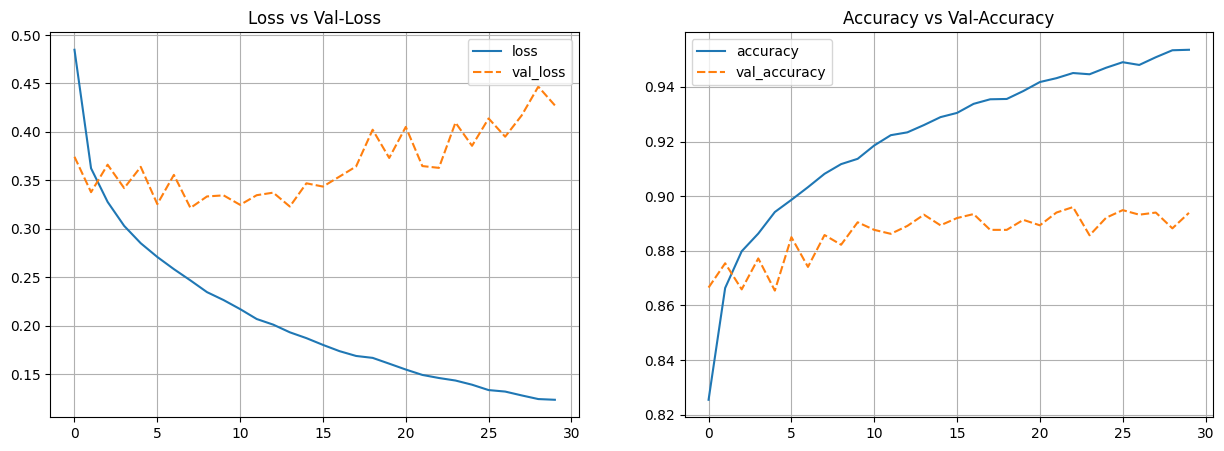

In [10]:
# Plot Training Results

history_seq_mnist_df = pd.DataFrame(history_seq_mnist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_seq_mnist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_seq_mnist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

We can see our model is overfit based on train-set and val-set. The train-loss continues to decreases as the epoch increases and val-loss decreases to a point and begins increasing again.

#### Predict An Image

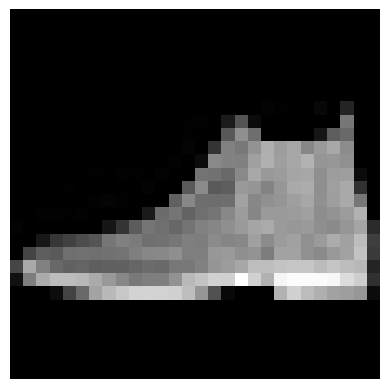

Class      :  9
Class Name :  Ankle boot


In [11]:
# Visualize a test image

test_image = X_test[0]
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.axis("off")
plt.show()

print('Class      : ', y_test[0])
print('Class Name : ', class_names[y_test[0]])

In [12]:
# Predict an image

y_pred = model_sequential_mnist.predict(np.expand_dims(test_image, 0))
y_pred

1/1 [==============================] - 0s 111ms/step


array([[8.0714418e-17, 7.6319528e-17, 4.4911153e-24, 5.2461838e-23,
        1.4989487e-19, 3.7197450e-09, 6.4959004e-20, 3.7559120e-09,
        2.2143563e-19, 1.0000000e+00]], dtype=float32)

In [13]:
# Probability for each class

y_pred_df = pd.DataFrame(y_pred, columns=class_names)
y_pred_df

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
0,8.071442e-17,7.631953e-17,4.491115e-24,5.246184e-23,1.498949e-19,3.719745e-09,6.495900e-20,3.755912e-09,2.214356e-19,1.0


In [14]:
# Get class prediction

y_pred_class = np.argmax(y_pred[0])
y_pred_class_name = class_names[np.argmax(y_pred[0])]

print('Prediction - Class       : ', y_pred_class)
print('Prediction - Class Name  : ', y_pred_class_name)

Prediction - Class       :  9
Prediction - Class Name  :  Ankle boot


#### Predict Test-Set

In [15]:
# Evaluate test-set

result = model_sequential_mnist.evaluate(X_test, y_test)
result

313/313 [==============================] - 1s 2ms/step - loss: 0.4944 - accuracy: 0.8898


[0.4944448173046112, 0.8898000121116638]

In [16]:
# Check the performance of test-set

## Get the probability
y_pred_mnist_proba = model_sequential_mnist.predict(X_test)

## Get class with maximum probability
y_pred_mnist = np.argmax(y_pred_mnist_proba, axis=-1)

313/313 [==============================] - 1s 2ms/step


In [17]:
y_pred_mnist_proba

array([[8.0714107e-17, 7.6319528e-17, 4.4911153e-24, ..., 3.7559120e-09,
        2.2143563e-19, 1.0000000e+00],
       [2.2704869e-07, 1.7984497e-16, 9.9988949e-01, ..., 4.0175695e-18,
        4.9167683e-15, 1.3437869e-20],
       [0.0000000e+00, 1.0000000e+00, 2.4993860e-32, ..., 0.0000000e+00,
        1.9731687e-32, 0.0000000e+00],
       ...,
       [2.9828810e-19, 8.1101368e-34, 3.4536644e-25, ..., 2.3268464e-28,
        1.0000000e+00, 9.6239647e-36],
       [1.2199183e-30, 1.0000000e+00, 1.2161809e-25, ..., 2.3566115e-35,
        5.3940643e-22, 2.2549749e-34],
       [2.6752242e-12, 9.3897359e-21, 4.6303958e-15, ..., 2.4419402e-09,
        2.0061247e-12, 2.5200861e-16]], dtype=float32)

In [18]:
# Check the performance of test-set

## Get the probability
y_pred_mnist_proba = model_sequential_mnist.predict(X_test)

## Get class with maximum probability
y_pred_mnist = np.argmax(y_pred_mnist_proba, axis=-1)

## Display Classification Report
print(classification_report(y_test, y_pred_mnist, target_names=np.array(class_names)))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.81      0.83      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.80      0.83      0.81      1000
       Dress       0.91      0.90      0.90      1000
        Coat       0.82      0.79      0.81      1000
      Sandal       0.98      0.95      0.96      1000
       Shirt       0.69      0.75      0.72      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.99      0.96      0.98      1000
  Ankle boot       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



**CONCLUSION**

Our model is considered as overfit due to increasing loss on val-set. Also, from Classification Report, it can be seen that the model has difficulty in predicting `Shirt` category.